In [5]:
import tensorflow as tf
from tensorflow.keras import datasets , layers , models
import matplotlib.pyplot as plt
import numpy as np

## Used to fetch test and training images

Returns

Tuple of Numpy arrays: (x_train, y_train), (x_test, y_test)

1. x_train, x_test: images (num_samples, 3, 32, 32)

2. y_train, y_test: labels (integers in range 0-9) each with shape (num_samples, 1)


In [6]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
print("Traning Data: "+str(X_train.shape)+" Labels: "+str(y_train.shape))

Traning Data: (50000, 32, 32, 3) Labels: (50000, 1)


## Reshaping 2D array to 1D array

* reshape(m,n)
    * m x n such that m*n elements else error 
    * -1 = auto   

In [7]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [8]:
y_train = y_train.reshape(-1,10)
y_train[:5]

array([[6, 9, 9, 4, 1, 1, 2, 7, 8, 3],
       [4, 7, 7, 2, 9, 9, 9, 3, 2, 6],
       [4, 3, 6, 6, 2, 6, 3, 5, 4, 0],
       [0, 9, 1, 3, 4, 0, 3, 7, 3, 3],
       [5, 2, 2, 7, 1, 1, 1, 2, 2, 0]], dtype=uint8)

In [9]:

y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [10]:
y_test = y_test.reshape(-1,)

## Plottiong test images

* defining classes acc to test data set
<br>
<img src="Capture.JPG">

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2)) #size
    plt.imshow(X[index])  #to plot 
    plt.xlabel(classes[y[index]]) #to show it's lable


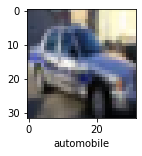

In [13]:
plot_sample(X_train, y_train, 311)

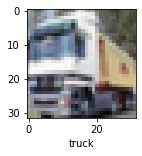

In [74]:
plot_sample(X_train, y_train, 1)

# ANN


1) layers.Dense(<numer_of_nurons>, activation='<activation_function>')

2) layers.Flatten(input_shape=<dimension*color>)-> 1d array of size 

Relu for learning and sigmoid for classifiaction

ann.compile(parameters)

    * optimizer = Gradient Decent
        Optimizers
            SGD
            RMSprop
            Adam
            Adadelta
            Adagrad
            Adamax
            Nadam
            Ftrl 
    * loss = loss function
    * metrices = Used to gudge performance of model

In [23]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)), # 
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='sigmoid')    
    ])

ann.compile(optimizer='RMSprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
ann.fit(X_test, y_test, epochs=5)

Epoch 1/5
313/313 [==============================] - 49s 155ms/step - loss: 9.6449 - accuracy: 0.1000
Epoch 2/5
313/313 [==============================] - 50s 160ms/step - loss: 9.6685 - accuracy: 0.1000
Epoch 3/5
313/313 [==============================] - 49s 156ms/step - loss: 9.6685 - accuracy: 0.1000
Epoch 4/5
313/313 [==============================] - 49s 155ms/step - loss: 9.6685 - accuracy: 0.1000
Epoch 5/5
313/313 [==============================] - 48s 153ms/step - loss: 9.6685 - accuracy: 0.1000


# CNN

1) layers.Conv2D(filters, kernel_size, activation, input_shape)

    * filters : no of filters ie: features
    * kernal_size : filter size m*n
    * activation : activation function
    * input_shape : input dimension with layer set

2) layers.MaxPooling2D()

    * read theory

In [43]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [44]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [46]:
cnn.fit(X_test, y_test, epochs=10)


Epoch 1/10
313/313 [==============================] - 12s 38ms/step - loss: 0.8344 - accuracy: 0.7052
Epoch 2/10
313/313 [==============================] - 11s 34ms/step - loss: 0.7747 - accuracy: 0.7290
Epoch 3/10
313/313 [==============================] - 11s 36ms/step - loss: 0.6815 - accuracy: 0.7580
Epoch 4/10
313/313 [==============================] - 12s 37ms/step - loss: 0.6088 - accuracy: 0.7838
Epoch 5/10
313/313 [==============================] - 12s 38ms/step - loss: 0.5224 - accuracy: 0.8180
Epoch 6/10
313/313 [==============================] - 12s 38ms/step - loss: 0.4792 - accuracy: 0.8263
Epoch 7/10
313/313 [==============================] - 12s 37ms/step - loss: 0.4079 - accuracy: 0.8539
Epoch 8/10
313/313 [==============================] - 12s 39ms/step - loss: 0.3965 - accuracy: 0.8613
Epoch 9/10
313/313 [==============================] - 12s 39ms/step - loss: 0.3646 - accuracy: 0.8745
Epoch 10/10
313/313 [==============================] - 12s 37ms/step - loss: 0.309